# Google Drive Setup

In [42]:
from google.colab import drive

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)    

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Navigate to Working Directory

In [43]:
cd /content/drive/My\ Drive/Masters/Deep\ Learning/model_evaluator/model_evaluator

/content/drive/My Drive/Masters/Deep Learning/model_evaluator/model_evaluator


# Model Evaluator Class

TODO:

1. Add model_training_class which stores the model_state_dict - Done
2. Add methods to store and retrive the information - Done
3. Add methods to print the information
4. Add methods to visualize between the models
5. Statements to deal with empty dictionary if it exists - list models, retreive loss over
6. Solidify and Covey the rigidity of the structure of dictionary i.e validate if the train_dict will fit the structure of the class

In [0]:
import model_evaluator as me


In [52]:
!python test_model_evaluation.py

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [46]:
!pip install nose

In [47]:
!nosetests test_model_evaluation.py

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [0]:
%pycat test_model_evaluation.py

# Dataset Download

In [0]:
#building a network
from torch import nn,optim
import torch.nn.functional as F
import datetime
import os
import cv2

In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


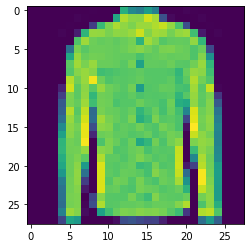

In [0]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

# Training Process and Dictionary Filling

In [0]:
def train_model(epochs,train_loader,model,criterion,optimizer,device = 'cpu',print_time_stats=True):
  model_architecture = {'model':str(model),'optimizer':optimizer,'critierion':criterion}
  data = {'train_set':str(trainset)}
  training_parameters = {'no_of_steps_per_epoch':len(train_loader),'device':device,'epochs':epochs,'time':str(datetime.datetime.now())}
  training_stats = {'total_train_time':None,'epoch_time':[],'epoch_average_batch_loss':[]}
  model_dict = {'model_architecture':model_architecture,'data':data,'training_parameters':training_parameters,'training_stats':training_stats}

  train_start_time = datetime.datetime.now()
  model.train()
  for e in range(epochs):
    epoch_start_time = datetime.datetime.now()
    running_loss = 0
    for images,labels in train_loader:
      if device != 'cpu':
        images, labels = images.cuda(),labels.cuda()
      images = images.view(-1,28*28)
      optimizer.zero_grad()
      output = model(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
    print(f"Average Loss per Batch : {running_loss/len(train_loader)}")
    model_dict['training_stats']['epoch_average_batch_loss'].append(running_loss.item()/len(train_loader))
    epoch_end_time = datetime.datetime.now()
    model_dict['training_stats']['epoch_time'].append(str(epoch_end_time - epoch_start_time))
    if print_time_stats:
      print(f"Epoch Time : {epoch_end_time - epoch_start_time}")
  train_end_time = datetime.datetime.now()
  model_dict['training_stats']['total_train_time'] = str(train_end_time - train_start_time)
  if print_time_stats:
    print(f"Training Time : {str(train_end_time - train_start_time)}")
  return model_dict

In [0]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,32),
                    nn.ReLU(),
                    nn.Linear(32,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
model_train_dict = train_model(5,trainloader,model,criterion,optimizer)

Average Loss per Batch : 0.5443868637084961
Epoch Time : 0:00:11.892123
Average Loss per Batch : 0.44448038935661316
Epoch Time : 0:00:11.789895
Average Loss per Batch : 0.41281092166900635
Epoch Time : 0:00:12.211135
Average Loss per Batch : 0.39881420135498047
Epoch Time : 0:00:12.268456
Average Loss per Batch : 0.381971538066864
Epoch Time : 0:00:12.018455
Training Time : 0:01:00.180402


In [0]:
path = "/content/drive/My Drive/Masters/Deep Learning/model_evaluator/model_evaluator/fashion_mnist_test.pkl"
fashion_mnist = me.ModelEvaluator('fashion_mnist',path)

In [0]:
fashion_mnist.reset_experiment()

In [0]:
fashion_mnist.is_empty()

True

In [0]:
fashion_mnist.add_model('fashion_mnist_2',model_train_dict)
fashion_mnist.add_model('fashion_mnist_1',model_train_dict)

In [0]:
fashion_mnist.list_models()

No Models added
